In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from skimage.color import rgb2hed, hed2rgb

In [2]:
from skimage import data, io, filters, viewer
#from scipy import constants
#from PIL import Image

/opt/conda/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [3]:
img1 = io.imread('blobs.tif', plugin="tifffile")
img2 = io.imread('FluorescentCells.tif', plugin="tifffile")
img3 = io.imread('FluorescentCells (2).tif', plugin="tifffile")

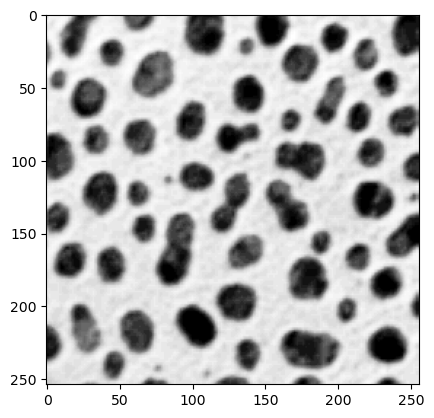

In [4]:
plt.imshow(img1,cmap='Greys')

In [21]:
print(np.shape(img2))

(512, 512, 3)


In [22]:
img2

array([[[ 16,  50,   0],
        [ 15,  44,   0],
        [ 18,  40,   1],
        ...,
        [  0,  26,   0],
        [  0,  26,   0],
        [  0,  26,   0]],

       [[ 13,  49,   1],
        [ 13,  44,   0],
        [ 15,  40,   1],
        ...,
        [  0,  26,   0],
        [  0,  26,   0],
        [  0,  26,   0]],

       [[ 12,  50,   1],
        [ 12,  45,   0],
        [ 13,  41,   1],
        ...,
        [  0,  26,   0],
        [  0,  26,   0],
        [  0,  26,   0]],

       ...,

       [[ 13,  18,  11],
        [  0,  22,   6],
        [  0,  25,   0],
        ...,
        [  1,  15,   2],
        [  1,  15,   2],
        [  1,  15,   2]],

       [[  0,  17,   0],
        [  0,  18,   0],
        [ 13,  23,   0],
        ...,
        [  1,  15,   2],
        [  1,  15,   2],
        [  1,  15,   2]],

       [[ 36,  20,   0],
        [ 73,  25,   5],
        [128,  32,  18],
        ...,
        [  1,  15,   2],
        [  1,  15,   2],
        [  1,  15,   2]]

In [5]:
img2_transpose = np.transpose(img2)

In [23]:
img2_transpose

array([[[ 16,  13,  12, ...,  13,   0,  36],
        [ 15,  13,  12, ...,   0,   0,  73],
        [ 18,  15,  13, ...,   0,  13, 128],
        ...,
        [  0,   0,   0, ...,   1,   1,   1],
        [  0,   0,   0, ...,   1,   1,   1],
        [  0,   0,   0, ...,   1,   1,   1]],

       [[ 50,  49,  50, ...,  18,  17,  20],
        [ 44,  44,  45, ...,  22,  18,  25],
        [ 40,  40,  41, ...,  25,  23,  32],
        ...,
        [ 26,  26,  26, ...,  15,  15,  15],
        [ 26,  26,  26, ...,  15,  15,  15],
        [ 26,  26,  26, ...,  15,  15,  15]],

       [[  0,   1,   1, ...,  11,   0,   0],
        [  0,   0,   0, ...,   6,   0,   5],
        [  1,   1,   1, ...,   0,   0,  18],
        ...,
        [  0,   0,   0, ...,   2,   2,   2],
        [  0,   0,   0, ...,   2,   2,   2],
        [  0,   0,   0, ...,   2,   2,   2]]], dtype=uint8)

In [6]:
red = [(0, 0, 0), (1,0,0)]
green= [(0, 0, 0), (0,1,0)]
blue = [(0, 0, 0), (0,0,1)] 
yellow = [(0, 0, 0), (1,1,0) ]
magenta = [(0, 0, 0), (1,0,1)]
cyan = [(0, 0, 0), (0,1,1)]
lut_red = LinearSegmentedColormap.from_list("Custom", red, N=256)
lut_green = LinearSegmentedColormap.from_list("Custom", green, N=256)
lut_blue = LinearSegmentedColormap.from_list("Custom", blue, N=256)
lut_cyan = LinearSegmentedColormap.from_list("Custom", cyan, N=256)
lut_magenta = LinearSegmentedColormap.from_list("Custom", magenta, N=256)
lut_yellow = LinearSegmentedColormap.from_list("Custom", yellow, N=256)

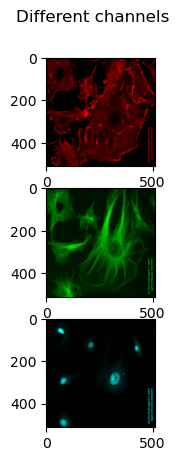

In [7]:
fig, axs = plt.subplots(3)
fig.suptitle('Different channels')
axs[0].imshow(img2_transpose[0], cmap=lut_red)
axs[1].imshow(img2_transpose[1],cmap=lut_green)
axs[2].imshow(img2_transpose[2],cmap=lut_cyan)

In [16]:
ch1 = np.concatenate(img2_transpose[0])
ch2 = np.concatenate(img2_transpose[1])
ch3 = np.concatenate(img2_transpose[2])

(array([1.36812e+05, 1.93860e+04, 1.94710e+04, 1.16070e+04, 9.67100e+03,
        7.60600e+03, 6.13400e+03, 4.95500e+03, 3.97500e+03, 3.42900e+03,
        2.86800e+03, 2.61500e+03, 2.22300e+03, 2.00800e+03, 1.79900e+03,
        1.66700e+03, 1.51700e+03, 1.39300e+03, 1.26400e+03, 1.19000e+03,
        1.23800e+03, 1.03200e+03, 9.64000e+02, 9.11000e+02, 7.43000e+02,
        7.07000e+02, 7.15000e+02, 7.10000e+02, 5.98000e+02, 5.47000e+02,
        4.71000e+02, 4.19000e+02, 3.97000e+02, 3.84000e+02, 3.30000e+02,
        3.03000e+02, 2.81000e+02, 2.16000e+02, 2.29000e+02, 2.06000e+02,
        1.61000e+02, 1.57000e+02, 1.36000e+02, 1.26000e+02, 1.11000e+02,
        8.60000e+01, 9.70000e+01, 7.60000e+01, 8.90000e+01, 6.90000e+01,
        6.60000e+01, 8.70000e+01, 5.60000e+01, 6.80000e+01, 6.10000e+01,
        5.50000e+01, 4.70000e+01, 4.70000e+01, 5.30000e+01, 4.70000e+01,
        7.80000e+01, 3.90000e+01, 5.30000e+01, 2.90000e+01, 3.80000e+01,
        5.70000e+01, 2.60000e+01, 4.70000e+01, 4.60

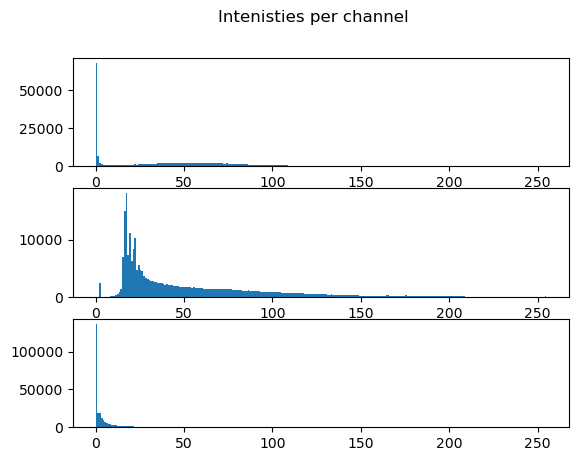

In [24]:
fig1, axs1 = plt.subplots(3)
fig1.suptitle('Intenisties per channel')
axs1[0].hist(ch1, bins=255)
axs1[1].hist(ch2, bins=255)
axs1[2].hist(ch3, bins=255)